Stack Exchange employs a reputation award system for its questions and answers. Each post — each question/answer — is a post that is subject to upvotes and downvotes. This ensures that good posts are easily identifiable.
To find out which topics are most popular it's enough to look up on table Posts, there we can find Score and ViewCount

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

#reading data
posts = pd.read_csv("2019_questions.csv", parse_dates = ["CreationDate"])
posts.info()
posts.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


In [2]:
posts.describe()

,Id,Score,ViewCount,AnswerCount,FavoriteCount
count,8839.000000,8839.000000,8839.000000,8839.000000,1407.000000
mean,54724.172870,0.870687,171.548026,0.787985,1.184790
std,6507.618509,1.410255,772.813626,0.851146,0.982766
min,43363.000000,-2.000000,2.000000,0.000000,0.000000
25%,48917.500000,0.000000,22.000000,0.000000,1.000000
50%,54833.000000,1.000000,40.000000,1.000000,1.000000
75%,60674.500000,1.000000,98.000000,1.000000,1.000000
max,65675.000000,45.000000,33203.000000,9.000000,16.000000


We can see that only column FavoriteCount has a lot of missing values (1407 existing values out of 8839 rows). We can replace it with 0
Also Tags column has an object type and it

In [3]:
posts["FavoriteCount"] = posts["FavoriteCount"].fillna(0).astype(int)
posts["FavoriteCount"].head()

0    0
1    0
2    0
3    0
4    0
Name: FavoriteCount, dtype: int64

In [4]:
#clean the Tags column
posts["Tags"] = posts["Tags"].str.replace("><",",").str.replace("<","").str.replace(">","")

questions = pd.DataFrame()
#assign the result to questions dataframe
questions["Tags"] = posts["Tags"]
questions["Tags"].head()

0                         machine-learning,data-mining
1    machine-learning,regression,linear-regression,...
2              python,time-series,forecast,forecasting
3                    machine-learning,scikit-learn,pca
4                  dataset,bigdata,data,speech-to-text
Name: Tags, dtype: object

In [5]:
#create dictionary with the information of how many times each tag was used and viewed
dic = {"Tags":[],"Used":[],"Viewed":[]}

#define the function
def used_viewed(row): 
    
    string = row["Tags"]
    views = row["ViewCount"]
    tags = string.split(",")
    
    for tag in tags: 
        if tag in dic["Tags"]:
            dic["Used"][dic["Tags"].index(tag)] = dic["Used"][dic["Tags"].index(tag)] + 1
            dic["Viewed"][dic["Tags"].index(tag)] = dic["Viewed"][dic["Tags"].index(tag)] + views
        else: 
            dic["Tags"].append(tag)
            dic["Used"].append(1)
            dic["Viewed"].append(views)
            
posts[["Tags","ViewCount"]].apply(used_viewed, axis = 1)

#final table
tag_results = pd.DataFrame(dic)
tag_results

,Tags,Used,Viewed
0,machine-learning,2693,388499
1,data-mining,217,31056
2,regression,347,49451
3,linear-regression,175,18978
4,regularization,50,4941
5,python,1814,537585
6,time-series,466,64134
7,forecast,34,8153
8,forecasting,85,8797
9,scikit-learn,540,128110


## Data Visualization

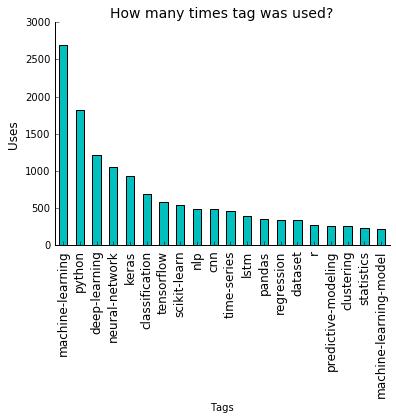

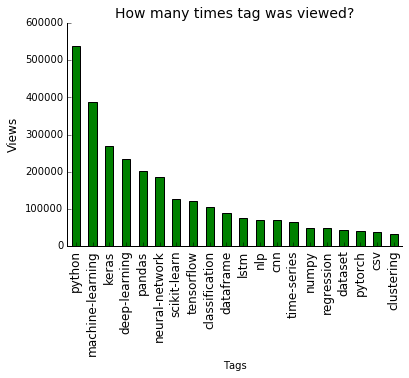

In [6]:
#top 20 tags by views and uses
uses = tag_results[["Tags","Used"]].sort_values(by = "Used", ascending = False)[0:20]
uses.reset_index(drop = True,inplace = True)
views = tag_results[["Tags","Viewed"]].sort_values(by = "Viewed", ascending = False)[0:20]
views.reset_index(drop = True, inplace = True)

#plotting top 15
fig = plt.figure(figsize=(12, 8))

ax1 = uses.plot(kind="bar", x = "Tags", y = "Used",legend = False, color = "c", fontsize = 12)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.tick_params(axis = "y", right = False, bottom = False, labelsize = 10)
ax1.tick_params(top = False)
ax1.set_title("How many times tag was used?", fontsize = 14)
plt.ylabel("Uses", fontsize = 12)

ax2 = views.plot(kind = "bar", x = "Tags", y = "Viewed", legend = False, color = "g", fontsize = 12)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.tick_params(axis = "y", right = False, bottom = False, labelsize = 10)
ax2.tick_params(top = False)
ax2. set_title("How many times tag was viewed?", fontsize= 14)
plt.ylabel("Views", fontsize = 12)

It seems that some of the topics belong in both tables, i.e : python, machine-learning, keras, deep-learning, neural-network, etc. 
The most used topics are machine-learning followed by python
The most viewed topics are python followed by machine-learning

## Further Analysis

The file all_questions.csv holds the result of the query below — this query fetches all of the questions ever asked on DSSE, their dates and tags.

In this we will track the interest in deep learning across time. We will:
- Count how many deep learning questions are asked per time period.
- The total amount of questions per time period.
- How many deep learning questions there are relative to the total amount of questions per time period.

In [13]:
all_questions = pd.read_csv("all_questions.csv", parse_dates = ["CreationDate"])

print(all_questions.info())
all_questions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21576 entries, 0 to 21575
Data columns (total 3 columns):
Id              21576 non-null int64
CreationDate    21576 non-null datetime64[ns]
Tags            21576 non-null object
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 505.8+ KB
None


,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>
1,45418,2019-02-12 00:50:39,<neural-network>
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>
3,45426,2019-02-12 04:51:49,<keras>
4,45427,2019-02-12 05:08:24,<r><predictive-modeling><machine-learning-mode...


In [14]:
#clean the Tags column
all_questions["Tags"] = all_questions["Tags"].str.replace("><",",").str.replace("<","").str.replace(">","")

In [32]:
#extracting deep learning topics
all_questions["Deep Learning"] = all_questions["Tags"].apply(lambda string: 1 if "deep-learning" in string.split(",") else 0)
#extract year and month from the CreationDate column
all_questions["Yearmonth"] = all_questions["CreationDate"].apply(lambda date : date.strftime("%Y%m"))
#Group by year and month
yearmonth = all_questions[all_questions["Deep Learning"] == 1].groupby("Yearmonth").sum()
yearmonth.drop("Id",axis =1, inplace = True)
yearmonth.head()

,Deep Learning
Yearmonth,
201406,1
201407,1
201410,1
201411,1
201412,4


([<matplotlib.axis.XTick at 0x7f8b8c57f3c8>,
 <a list of 11 Text xticklabel objects>)

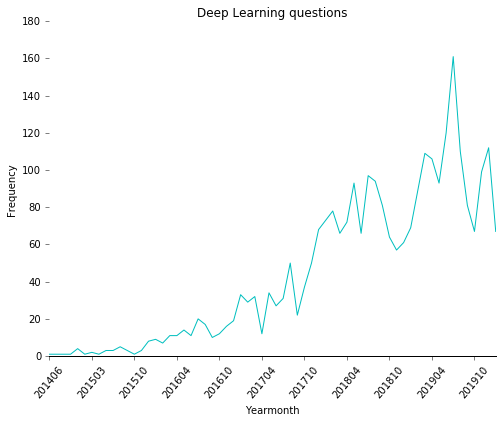

In [34]:
#plotting the results

ax3 = yearmonth.plot(figsize=(8,6), legend=False, color="c")
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)
ax3.spines["left"].set_visible(False)
plt.tick_params(top=False, right=False, direction="out")
plt.ylabel("Frequency")
plt.title("Deep Learning questions")
# Set the x-ticks and the labels to show every 6th month for readability
x_ticks = [tick for tick in range(0,65,6)]
dates = yearmonth.index[::6]
plt.xticks(x_ticks, dates, rotation=50)

The line graph above shows us that questions related to deep-learning were in trend (160 questions) specifically in the middle of 2019 year. After and before this period of time questions lie around 100 and less before 2018.

## Top-5 tags across the time
Now we are interested which topics are the most popular across the time period.

In [38]:
for tag in list(uses["Tags"][0:5]):
    all_questions[tag] = all_questions["Tags"].apply(lambda string: 1 if tag in string.split(",") else 0)

all_questions.drop(["Id","Deep Learning"], axis = 1, inplace = True)
all_questions.head()

,CreationDate,Tags,Yearmonth,machine-learning,python,deep-learning,neural-network,keras
0,2019-02-12 00:36:29,"python,keras,tensorflow,cnn,probability",201902,0,1,0,0,1
1,2019-02-12 00:50:39,neural-network,201902,0,0,0,1,0
2,2019-02-12 04:40:51,"python,ibm-watson,chatbot",201902,0,1,0,0,0
3,2019-02-12 04:51:49,keras,201902,0,0,0,0,1
4,2019-02-12 05:08:24,"r,predictive-modeling,machine-learning-model,s...",201902,0,0,0,0,0


([<matplotlib.axis.XTick at 0x7f8b8c536860>,
 <a list of 11 Text xticklabel objects>)

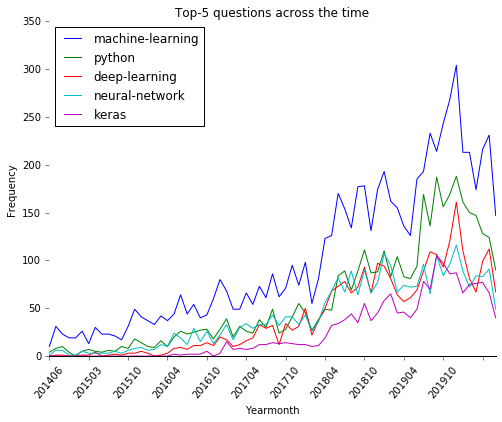

In [42]:
##plotting the results
ax4 = all_questions.groupby("Yearmonth").sum().plot(figsize = (8,6))
ax4.spines["top"].set_visible(False)
ax4.spines["right"].set_visible(False)
ax4.spines["left"].set_visible(False)
plt.tick_params(top=False, right=False, direction="out")
plt.ylabel("Frequency")
plt.title("Top-5 questions across the time")
# Set the x-ticks and the labels to show every 6th month for readability
x_ticks = [tick for tick in range(0,69,6)]
dates = yearmonth.index[::6]
plt.xticks(x_ticks, dates, rotation=50)

According to graph deep-learning on 3rd of popularity among other topics. The 1st place for machine-learning, the 2nd for python.

### How many deep learning questions there are relative to the total amount of questions per time period?

In [53]:
#calculating when machine-learning, deep-learning and neural-network appear together
def relative(row):
    
    ml = row["machine-learning"]
    dl = row["deep-learning"]
    nn = row["neural-network"]
    
    if ml == 0:
        return 0
    else:
        if dl == 0 and nn == 0:
            return "only ml"
        elif dl == 1 and nn == 0:
            return "ml and dl"
        elif dl == 0 and nn == 1: 
            return "ml and nn"
        else:
            return "ml, dl and nn"

all_questions["ML,DL,NN"] = all_questions[["machine-learning","deep-learning","neural-network"]].apply(relative, axis = 1)
all_questions["ML,DL,NN"].head()

0    0
1    0
2    0
3    0
4    0
Name: ML,DL,NN, dtype: object

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

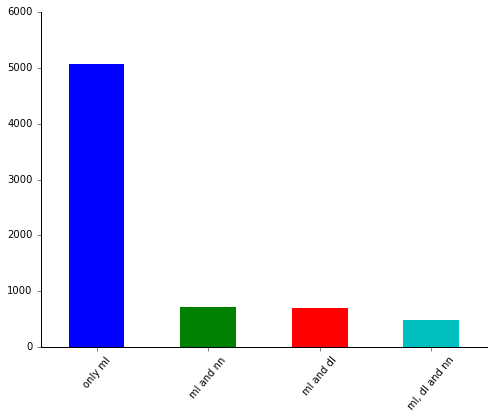

In [54]:
##plotting the result
ax5 = all_questions["ML,DL,NN"].value_counts()[1:5].plot(kind='bar', figsize=(8,6), edgecolor='none')
ax5.tick_params(top=False, right=False, direction='out')
ax5.spines["top"].set_visible(False)
ax5.spines["right"].set_visible(False)
plt.xticks(rotation=50)

The graph shows that machine-learning appears with neural-network around the same as ML with deep-learning. Ml, Dl and Nn appear together a bit rare.